In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import uxarray as ux



In [2]:
mesh_file = '/Users/brianpm/Desktop/ne30pg3_esmf_20200428.nc'
scrip_file = '/Users/brianpm/Desktop/ne30pg3_scrip_170604.nc'
data_file = '/Users/brianpm/Desktop/eaton_rrtmgp_qpc6_01.cam.h0a.0003-12.nc'

In [51]:

#
# METHOD 1: Use matplotlib's triangulation to make a contour plot
#

# STATUS: this works

# PRO: fast and relatively easy
# CON: works for contours, but not raster-type image; relies on triangulation which could introduce a little error if looking very closely at things

xrds = xr.open_dataset(data_file)
VNAME = "FLUT"
lon = xrds['lon']
lat = xrds['lat']


cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(xrds[VNAME].min(), xrds[VNAME].max())
levels = np.linspace(xrds[VNAME].min(), xrds[VNAME].max(), 25)
print(levels)

fig = plt.figure(figsize=(16,9))

proj = ccrs.Mollweide()

x, y, _ = proj.transform_points(ccrs.PlateCarree(), lon, lat).T

mask = np.invert(np.logical_or(np.isinf(x), np.isinf(y)))
x = np.compress(mask, x)
y = np.compress(mask, y)

ax = plt.axes(projection=proj)

img = ax.tricontourf(x, y, xrds[VNAME].squeeze(), levels=levels, norm=norm, cmap=cmap)

ax.coastlines()

fig.colorbar(img, label=f'{VNAME} {xrds[VNAME].attrs["units"]}')
fig.savefig("/Users/brianpm/Desktop/TESTPLOT_xr.png")

[169.87153625 174.62653414 179.38153203 184.13652992 188.89152781
 193.6465257  198.40152359 203.15652148 207.91151937 212.66651726
 217.42151515 222.17651304 226.93151093 231.68650881 236.4415067
 241.19650459 245.95150248 250.70650037 255.46149826 260.21649615
 264.97149404 269.72649193 274.48148982 279.23648771 283.9914856 ]


In [54]:
#
# METHOD 2: Use UXarray & matplotlib's polycollection
#

# STATUS: does not produce expected output

ds = ux.open_dataset(scrip_file, data_file)
da = ds['FLUT'].squeeze()

# Can try to go directly to MPL PolyCollection
da_polycoll, _ = da.to_polycollection(override=True, cache=False)
da_polycoll.set_transform(ccrs.PlateCarree())  # I think this should be PlateCarree when the vertices are in lat/lon

# trying to color by the variable value
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(da.min(), da.max())
colors = cmap(norm(da))
da_polycoll.set_color(colors)

fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})  # I thought this could be any projection
ax.coastlines()
ax.set_global()
ax.add_collection(da_polycoll)
ax.set_rasterization_zorder(10_000)  # to reduce the file size and rendering time
fig.savefig("/Users/brianpm/Desktop/TESTPLOT_polycollection.png")

/Users/brianpm/opt/miniconda3/envs/p11/lib/python3.11/site-packages/uxarray/core/utils.py:22: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ds.dims[dim] == grid.n_face:
/Users/brianpm/opt/miniconda3/envs/p11/lib/python3.11/site-packages/uxarray/grid/grid.py:426: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self._ds.dims["n_face"]
/Users/brianpm/opt/miniconda3/envs/p11/lib/python3.11/site-packages/uxarray/core/utils.py:24: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.d

In [32]:
da_polycoll.properties().keys()

dict_keys(['agg_filter', 'alpha', 'animated', 'antialiased', 'array', 'capstyle', 'children', 'clim', 'clip_box', 'clip_on', 'clip_path', 'cmap', 'edgecolor', 'facecolor', 'figure', 'fill', 'gid', 'hatch', 'in_layout', 'joinstyle', 'label', 'linestyle', 'linewidth', 'mouseover', 'offset_transform', 'offsets', 'path_effects', 'paths', 'picker', 'pickradius', 'rasterized', 'sizes', 'sketch_params', 'snap', 'transformed_clip_path_and_affine', 'transforms', 'url', 'urls', 'visible', 'zorder'])

In [58]:
any(False, False, False)

TypeError: any() takes exactly one argument (3 given)

/Users/brianpm/opt/miniconda3/envs/p11/lib/python3.11/site-packages/uxarray/grid/grid.py:426: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self._ds.dims["n_face"]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Image   [x,y]   (x_y FLUT)
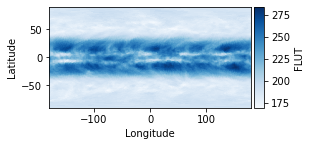

In [7]:
da.plot.rasterize(projection=ccrs.Mollweide(), backend='matplotlib')


In [8]:
proj_target = ccrs.Mollweide()

# Convert to Geodataframe
gdf = da.to_geodataframe() # spatialpandas.geodataframe.GeoDataFrame

# spatialpandas to geopandas
geopd_obj = gdf.to_geopandas()
geopd_obj = geopd_obj.set_crs(ccrs.PlateCarree())
print(type(geopd_obj))

# do projection
df_moll = geopd_obj.to_crs(proj_target)

/Users/brianpm/opt/miniconda3/envs/p11/lib/python3.11/site-packages/uxarray/grid/grid.py:426: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self._ds.dims["n_face"]


<class 'geopandas.geodataframe.GeoDataFrame'>


In [17]:
df_moll['geometry'][4] == df_moll['geometry']

0        False
1        False
2        False
3        False
4         True
         ...  
48595    False
48596    False
48597    False
48598    False
48599    False
Name: geometry, Length: 48600, dtype: bool

In [9]:
def color_by_var(geom):
    index_value = geom.inde
    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(geopd_obj['FLUT'].min(), geopd_obj['FLUT'].max())
    return {"facecolor": cmap(norm(geom['FLUT'])), "edgecolor":"none"}

proj = proj_target
# colors = [cmap(norm(df_moll.iloc[i]['FLUT'])) for i in df_moll.index]

fig, ax = plt.subplots(subplot_kw={"projection": proj})
print("start")

ax.add_geometries(df_moll['geometry'], crs=proj, styler=color_by_var)
print("done")
ax.coastlines()
print("set rasterization")
ax.set_rasterization_zorder(10_000)
print("send to renderer")
fig.savefig("/Users/brianpm/Desktop/TESTPLOT.png")


start
done
set rasterization
send to renderer


TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

In [52]:
ax.add_geometries?

Signature: ax.add_geometries(geoms, crs, **kwargs)
Docstring:
Add the given shapely geometries (in the given crs) to the axes.

Parameters
----------
geoms
    A collection of shapely geometries.
crs
    The cartopy CRS in which the provided geometries are defined.
styler
    A callable that returns matplotlib patch styling given a geometry.

Returns
-------
A :class:`cartopy.mpl.feature_artist.FeatureArtist` instance
    The instance responsible for drawing the feature.

Note
----
    Matplotlib keyword arguments can be used when drawing the feature.
    This allows standard Matplotlib control over aspects such as
    'facecolor', 'alpha', etc.
File:      ~/opt/miniconda3/envs/p11/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py
Type:      method

In [ ]:
hv_polygons = hv.Polygons(gdf, vdims=da.name)

In [113]:
ss = [s.to_shapely() for s in gdf.geometry]

In [118]:
sss = ss[0]

In [126]:
gdf.geometry

0        MultiPolygon([[[-45.0, -35.26438903808594, -44...
1        MultiPolygon([[[-44.0, -35.728965759277344, -4...
2        MultiPolygon([[[-43.0, -36.18000793457031, -42...
3        MultiPolygon([[[-45.0, -34.327022552490234, -4...
4        MultiPolygon([[[-44.0, -34.78609848022461, -43...
                               ...                        
48595    MultiPolygon([[[135.0, 37.17228698730469, 133....
48596    MultiPolygon([[[133.998779296875, 36.682922363...
48597    MultiPolygon([[[137.003662109375, 37.139705657...
48598    MultiPolygon([[[136.001220703125, 36.682922363...
48599    MultiPolygon([[[135.0, 36.21272659301758, 134....
Name: geometry, Length: 48600, dtype: multipolygon[float64]

In [39]:
patches=[mpl.patches.Polygon(p.array(),closed=True) for p in hv_polygons.data]    

AttributeError: 'str' object has no attribute 'array'

In [80]:
gv_polygons = gv.Polygons(gdf, vdims="FLUT", crs=ccrs.PlateCarree())

In [75]:
features = gv.Overlay([gf.coastline])
(gv_polygons*features).opts(opts.Image(projection=crs.Geostationary(), cmap='Greens', xaxis=None, yaxis=None), backend='matplotlib', fig='pdf', size=300)

NameError: name 'opts' is not defined

In [91]:
type(gv_polygons)

geoviews.element.geo.Polygons

:Polygons   [Longitude,Latitude]   (FLUT)
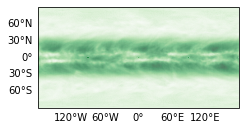

In [90]:
gv_polygons.opts(cmap='Greens', edgecolor='none', projection=ccrs.PlateCarree())

In [98]:


# does uxarray understand regular grids?
uds2 = ux.open_dataset("/Users/brianpm/Documents/model_output/control/e2p3b09.F2000climo.ne30pg3.ctl002.cam.h0.0002-04.nc",
                       "/Users/brianpm/Documents/model_output/control/e2p3b09.F2000climo.ne30pg3.ctl002.cam.h0.0002-04.nc")

RuntimeError: Could not recognize dataset format.

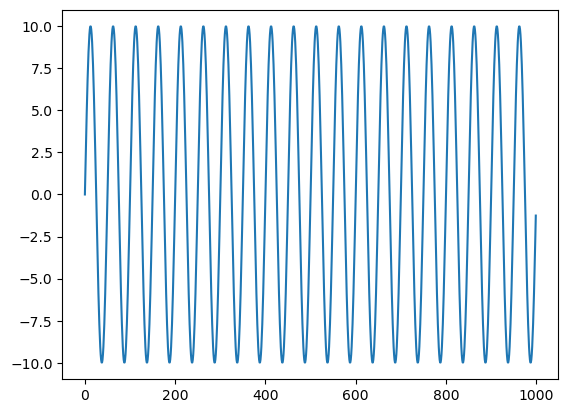

In [68]:
%matplotlib inline
x = np.arange(1000)
A = 10.0
twopi = 2.0 * np.pi
f = 1/50.0
p = 0.0
y = A * np.sin(twopi * f * x - p)

plt.plot(x, y)
plt.show()

In [60]:
#
#
#

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18